In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import netCDF4 as nc

mpl.rcParams['font.size'] = 12
mpl.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['font.family'] = 'Dejavu Serif'
mpl.rcParams["axes.formatter.use_mathtext"] = True

In [69]:
# params
loc4 = "/scratch/hcm7920/amb0/data/"
loc3 = "/scratch/hcm7920/ambData/channelMean/"
loc1 = "/home/hcm7920/experiments/arcticMiddepthBI/plots/officialFigs/"
loc2 = "/home/hcm7920/experiments/arcticMiddepthBI/analysis/figData/"

nx = 500
ny = 500
nz = 50
dx = 2000
dy = 2000

concIndex = -1
conc = [0,20,40,60,80,100]
dI = 32

g = 9.81
rhoConst = 1000
f0 = 1.4e-4

In [70]:
# load arrays
modelDepth   = nc.Dataset(loc4+"grid.nc")["Z"][:]*-1
modelNSquare = np.load(loc3+"channelMeanN2.npy")[1:,250,concIndex]
modelRho     = np.load(loc3+"channelMeanRho.npy")[1:,:,concIndex]+rhoConst
modelVelU    = np.load(loc3+"channelMeanU.npy")[:,:,concIndex]

In [71]:
# load target fields
targetNSquare = np.load(loc2+"modelNSquare.npy")
targetRho = np.load(loc2+"modelRho.npy")
targetVelU = np.load(loc2+"modelVelU.npy")
targetGma = np.load(loc2+"meanGdy.npy")
GammaDepth = np.load(loc2+"dpthGdy.npy")

In [72]:
targetRho.mean()-modelRho.mean()

28.925920360445275

In [73]:
# calculate Dgamma Dy

dRhody = (modelRho[:,249]-modelRho[:,251])/(2*dy)
dRhodz = modelNSquare * rhoConst / -g
isoSlope = dRhody/dRhodz

meanGdy = f0*(isoSlope[:-1]-isoSlope[1:])/np.abs(modelDepth[1:-1]-modelDepth[2:])
dpthGdy = -np.abs(modelDepth[1:-1]+modelDepth[2:])/2

In [74]:
# generate horizonal grid

crossChannelDist = np.linspace(-0.5*dy*ny,0.5*dy*ny,ny)/1000

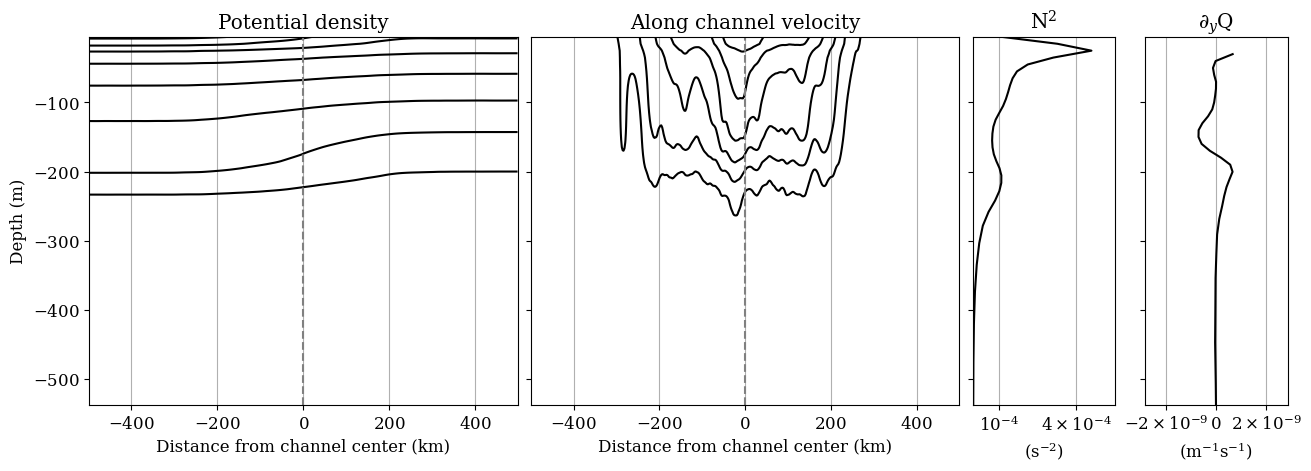

In [75]:
# construct fig
fac = 1 - 1e-3
layout = [["A","A","A","B","B","B","C","D"]]
yLims = [(-modelDepth[:dI]).min(),(-modelDepth[:dI]).max()]
fig,axDict = plt.subplot_mosaic(layout,sharey=True,
                               figsize=(13,4.6), layout='constrained');

# subplot A, density
levs = np.linspace(fac*modelRho[:,1:-1].min(),fac*modelRho[:,1:-1].max(),10)

axDict['A'].contour(crossChannelDist[1:-1], -modelDepth[:dI],
                    modelRho[:dI,1:-1], levs,
                    colors="black")
# axDict['A'].contour(crossChannelDist[1:-1], -modelDepth[:dI],
                    # targetRho[:dI,1:-1,250], levs,
                    # colors="blue",linewidths=0.5)

axDict['A'].vlines(0,-modelDepth[dI-1],0, 
                   colors="grey",linestyles="dashed")

axDict['A'].set_ylim(yLims)
axDict['A'].set_title("Potential density")
axDict['A'].set_ylabel("Depth (m)")
axDict['A'].set_xlabel("Distance from channel center (km)")
axDict['A'].grid(visible=True,axis='x')



# subplot B, along channel velocity
levs2 = np.linspace(2e-3,modelVelU.max(),7)

im = axDict['B'].contour(crossChannelDist, -modelDepth[:dI],
                         modelVelU[:dI, :], levs2, 
                         colors="black")
# im = axDict['B'].contour(crossChannelDist, -modelDepth[:dI],
                         # targetVelU[:dI, :,250], levs2, 
                         # colors="blue",linewidths=0.5)

axDict['B'].vlines(0,-modelDepth[dI-1],0, 
                   colors="grey",linestyles="dashed")

# axDict['B'].clabel(im, levs2, inline=True, 
#                    fmt = lambda x: f"{x*100:.1f}")

axDict['B'].set_title("Along channel velocity")
axDict['B'].set_xlabel("Distance from channel center (km)")
axDict['B'].grid(visible=True,axis='x')


# subplot C, N^2
axDict['C'].plot(modelNSquare[:dI],-modelDepth[:dI],
                 color="black")
# axDict['C'].plot(targetNSquare[:dI],-modelDepth[:dI],
                 # color="blue",linewidth=0.5)

lgFmt = tkr.LogFormatterSciNotation(base=10.0, 
                         labelOnlyBase=False, 
                         minor_thresholds=(np.inf,np.inf))
axDict['C'].xaxis.set_major_locator(tkr.FixedLocator([1e-4,4*1e-4]))
axDict['C'].xaxis.set_major_formatter(lgFmt)
axDict['C'].xaxis.set_minor_formatter(lgFmt)

axDict['C'].set_xlabel(r"$(\mathrm{s}^{-2})$")#\times 10^{-4}$")
axDict['C'].set_title(r"$\mathrm{N}^2$")
axDict['C'].set_xlim([0,5.5e-4])
axDict['C'].grid(visible=True,axis='x')


# subplot D, gamma
axDict['D'].plot(meanGdy[1:dI],dpthGdy[1:dI],
                 color="black")
# axDict['D'].plot(targetGma[1:dI],dpthGdy[1:dI],
                 # color="blue",linewidth=0.5)

lgFmt = tkr.LogFormatterSciNotation(base=10.0, 
                         labelOnlyBase=False, 
                         minor_thresholds=(np.inf,np.inf))
axDict['D'].xaxis.set_major_locator(tkr.FixedLocator([-2e-9,0,2e-9]))
axDict['D'].xaxis.set_major_formatter(lgFmt)
axDict['D'].xaxis.set_minor_formatter(lgFmt)

axDict['D'].set_xlim([-2.85e-9,2.85e-9])
axDict['D'].set_xlabel(r"$(\mathrm{m}^{-1}\mathrm{s}^{-1})$")
axDict['D'].set_title(r"$\partial_y \mathrm{Q}$")
axDict['D'].grid(visible=True,axis='x')

plt.savefig(loc1+f"figMeanStateSection-{conc[concIndex]}.pdf")